In [1]:
# evaluate an ARIMA model using a walk-forward validation
#Reference: https://facebook.github.io/prophet/
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pandas as datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
ground_floor = pd.read_csv('/Users/Ellina/Desktop/Project_code/ground_floor_sorted.csv', header = None)
first_floor = pd.read_csv('/Users/Ellina/Desktop/Project_code/first_floor_sorted.csv', header = None)
second_floor = pd.read_csv('/Users/Ellina/Desktop/Project_code/second_floor_sorted.csv', header = None)
third_floor = pd.read_csv('/Users/Ellina/Desktop/Project_code/third_floor_sorted.csv', header = None)

In [3]:
train_size = round(len(ground_floor)*0.8)                                    

ground_floor_train = ground_floor[:train_size]
ground_floor_test = ground_floor[train_size:]

ground_floor_train[0] = pd.to_datetime(ground_floor_train[0])
ground_floor_test[0] = pd.to_datetime(ground_floor_test[0])

ground_floor_train = ground_floor_train.set_index(0)
ground_floor_test = ground_floor_test.set_index(0)
print(ground_floor_test.tail())

                            1
0                            
2020-03-11 02:00:00+00:00  26
2020-03-11 03:00:00+00:00  27
2020-03-11 04:00:00+00:00  28
2020-03-11 05:00:00+00:00  27
2020-03-11 06:00:00+00:00  35


<ipython-input-3-5db2da1fbf25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_floor_train[0] = pd.to_datetime(ground_floor_train[0])
<ipython-input-3-5db2da1fbf25>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ground_floor_test[0] = pd.to_datetime(ground_floor_test[0])


In [4]:
train_size = round(len(first_floor)*0.8)                                    

first_floor_train = first_floor[:train_size]
first_floor_test = first_floor[train_size:]

first_floor_train[0] = pd.to_datetime(first_floor_train[0])
first_floor_test[0] = pd.to_datetime(first_floor_test[0])

first_floor_train = first_floor_train.set_index(0)
first_floor_test = first_floor_test.set_index(0)

<ipython-input-4-ba407c3b4f6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_floor_train[0] = pd.to_datetime(first_floor_train[0])
<ipython-input-4-ba407c3b4f6f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_floor_test[0] = pd.to_datetime(first_floor_test[0])


In [5]:
train_size = round(len(second_floor)*0.8)                                    

second_floor_train = second_floor[:train_size]
second_floor_test = second_floor[train_size:]

second_floor_train[0] = pd.to_datetime(second_floor_train[0])
second_floor_test[0] = pd.to_datetime(second_floor_test[0])

second_floor_train = second_floor_train.set_index(0)
second_floor_test = second_floor_test.set_index(0)

<ipython-input-5-baf608d22ffb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_floor_train[0] = pd.to_datetime(second_floor_train[0])
<ipython-input-5-baf608d22ffb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_floor_test[0] = pd.to_datetime(second_floor_test[0])


In [6]:
train_size = round(len(third_floor)*0.8)                                    

third_floor_train = third_floor[:train_size]
third_floor_test = third_floor[train_size:]

third_floor_train[0] = pd.to_datetime(third_floor_train[0])
third_floor_test[0] = pd.to_datetime(third_floor_test[0])

third_floor_train = third_floor_train.set_index(0)
third_floor_test = third_floor_test.set_index(0)


<ipython-input-6-7886c2b0d0f8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_floor_train[0] = pd.to_datetime(third_floor_train[0])
<ipython-input-6-7886c2b0d0f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_floor_test[0] = pd.to_datetime(third_floor_test[0])


## Reframe Dataset and Plot

In [7]:
#Training dataset 
#We only need the column of people for ARIMA for each floor 
ground_sarimax_train = pd.DataFrame(ground_floor_train[1], index=ground_floor_train.index)
first_sarimax_train = pd.DataFrame(first_floor_train[1], index=first_floor_train.index)
second_sarimax_train = pd.DataFrame(second_floor_train[1], index=second_floor_train.index)
third_sarimax_train = pd.DataFrame(third_floor_train[1], index=third_floor_train.index)

In [8]:
#Testing dataset
ground_sarimax_test = pd.DataFrame(ground_floor_test[1], index=ground_floor_test.index)
first_sarimax_test = pd.DataFrame(first_floor_test[1], index=first_floor_test.index)
second_sarimax_test = pd.DataFrame(second_floor_test[1], index=second_floor_test.index)
third_sarimax_test = pd.DataFrame(third_floor_test[1], index=third_floor_test.index)


def walk_forward_validation(data, n_test):
    predictions = np.array([])
    mape_list = []
    train, test = ground_sarimax_train, ground_sarimax_test
    day_list = [1, 2, 3, 4]
    
    for i in day_list:
        # Fit model to training data
        model = sm.tsa.statespace.SARIMAX(train, order=(1,1,2))       
        model = model.fit(max_iter = 50,method = 'powell')
        
        # Forecast daily loads for week i
        forecast = model.get_forecast(steps = 7)
        predictions = np.concatenate(predictions, forecast, 
                                     axis=None)
        # Calculate MAPE and add to mape_list
        j = i-7
        mape_score = (abs(test[j:i]-predictions[j:i])/test[j:i])*100
        mape_mean = mape_score.mean()
        mape_list.append(mape_mean)
        # Add week i to training data for next loop
        train = np.concatenate((train, test[j:i]), axis=None)
    return predictions, mape_list



## Data Stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(ground_sarimax_train)
print("ground:",adf, pvalue, usedlag_, nobs_, critical_values_, icbest_)

adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(first_sarimax_train)
print("first:", adf, pvalue, usedlag_, nobs_, critical_values_, icbest_)

adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(second_sarimax_train)
print("second:", adf, pvalue, usedlag_, nobs_, critical_values_, icbest_)

adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(third_sarimax_train)
print("third:", adf, pvalue, usedlag_, nobs_, critical_values_, icbest_)

ground: -6.93748519999493 1.0455572795954224e-09 29 4049 {'1%': -3.431966065833569, '5%': -2.8622540894375383, '10%': -2.5671501170045796} 46660.17673357758
first: -5.662501008252694 9.310468266217737e-07 30 4013 {'1%': -3.431980572598556, '5%': -2.8622604977715755, '10%': -2.5671535285260605} 37176.00806432889
second: -6.551451206601632 8.830035381078856e-09 30 4035 {'1%': -3.431971676574459, '5%': -2.8622565679746566, '10%': -2.5671514364705357} 43784.446180036124
third: -6.801319482842341 2.233295749701844e-09 26 4089 {'1%': -3.431950246982388, '5%': -2.8622471014565276, '10%': -2.5671463969100095} 42840.62121647791


## SARIMA Model Parameters -- ACF and PACF Plots

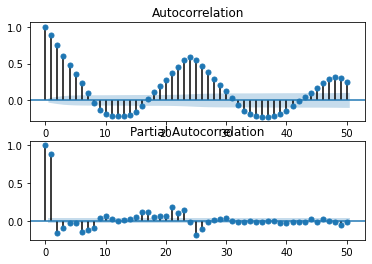

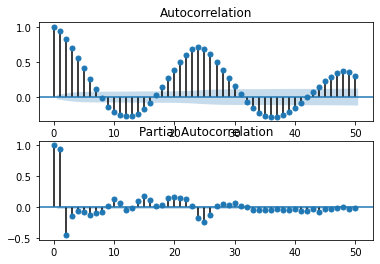

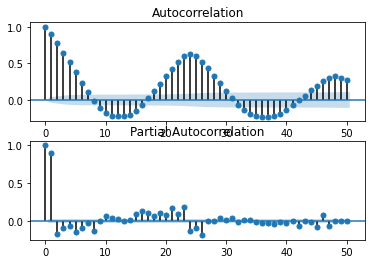

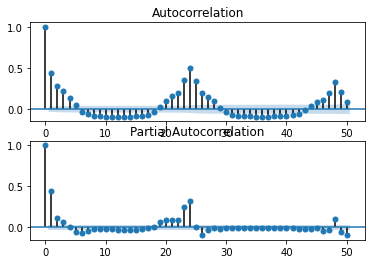

In [10]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(ground_sarimax_train, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(ground_sarimax_train, lags=50, ax=ax[1])
plt.show()

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(first_sarimax_train, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(first_sarimax_train, lags=50, ax=ax[1])
plt.show()

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(second_sarimax_train, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(second_sarimax_train, lags=50, ax=ax[1])
plt.show()

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(third_sarimax_train, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(third_sarimax_train, lags=50, ax=ax[1])
plt.show()

## Define Model

In [11]:
ground_sarimax_model = SARIMAX(ground_sarimax_train, order=(0, 1, 2), seasonal_order=(0, 1, 1, 7))
first_sarimax_model = SARIMAX(first_sarimax_train, order=(0, 1, 2), seasonal_order=(0, 1, 1, 7))
second_sarimax_model = SARIMAX(second_sarimax_train, order=(0, 1, 2), seasonal_order=(0, 1, 1, 7))
third_sarimax_model = SARIMAX(third_sarimax_train, order=(0, 1, 2), seasonal_order=(0, 1, 1, 7))


/Users/Ellina/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Ellina/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Ellina/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/Ellina/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarnin

## Fit Model and Make Prediction

In [12]:
#Reference
# ground_sarimax_predict = ground_sarimax_model.fit(max_iter=50, method='powell').predict(typ='levels')

ground_sarimax_predict = ground_sarimax_model.fit(max_iter=50, method='powell').predict(start=len(ground_sarimax_test), end=len(ground_sarimax_test) + 3030, dynamic=False, typ='levels')
first_sarimax_predict = first_sarimax_model.fit(max_iter=50, method='powell').predict(start=len(first_sarimax_test), end=len(first_sarimax_test) + 3030, dynamic=False, typ='levels')
second_sarimax_predict = second_sarimax_model.fit(max_iter=50, method='powell').predict(start=len(second_sarimax_test), end=len(second_sarimax_test) + 3030, dynamic=False, typ='levels')
third_sarimax_predict = third_sarimax_model.fit(max_iter=50, method='powell').predict(start=len(third_sarimax_test), end=len(third_sarimax_test) + 3030, dynamic=False, typ='levels')

# first_sarimax_predict = first_sarimax_model.fit(max_iter=50, method='powell').predict()
# second_sarimax_predict = second_sarimax_model.fit(max_iter=50, method='powell').predict()
# third_sarimax_predict = third_sarimax_model.fit(max_iter=50, method='powell').predict()



Optimization terminated successfully.
         Current function value: 5.898174
         Iterations: 3
         Function evaluations: 175
Optimization terminated successfully.
         Current function value: 4.834675
         Iterations: 3
         Function evaluations: 186
Optimization terminated successfully.
         Current function value: 5.575272
         Iterations: 3
         Function evaluations: 176
Optimization terminated successfully.
         Current function value: 5.382051
         Iterations: 5
         Function evaluations: 254


In [13]:
# ground_sarimax_predict = ground_sarimax_model.predict(start=len(ground_sarimax_test), end=len(ground_sarimax_test)+1, type='levels')
# first_sarimax_predict = first_sarimax_model.predict()
# second_sarimax_predict = second_sarimax_model.predict()
# third_sarimax_predict = third_sarimax_model.predict()


In [17]:
# rmse for Auto_ARIMA models (TESTING)
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse_ground = np.sqrt(mean_squared_error(ground_sarimax_predict,ground_sarimax_test))
mse_ground = mean_absolute_error(ground_sarimax_predict,ground_sarimax_test)
print('SARIMAX RMSE (Ground Floor):',rmse_ground)
print('SARIMAX MSE (Ground Floor):', mse_ground)
# ground_sarimax_test, y_pred = np.array(ground_sarimax_test), np.array(ground_sarimax_predict)
# mape_ground = np.mean(np.abs((ground_sarimax_test - ground_sarimax_predict/ground_sarimax_test)) * 100)
# print('SARIMAX MAPE (Ground Floor):', mape_ground)

rmse_first = np.sqrt(mean_squared_error(first_sarimax_predict,first_sarimax_test))
print('SARIMAX RMSE (First Floor):',rmse_first)

rmse_second = np.sqrt(mean_squared_error(second_sarimax_predict,second_sarimax_test))
print('SARIMAX RMSE (Second Floor):',rmse_second)

rmse_third = np.sqrt(mean_squared_error(third_sarimax_predict,third_sarimax_test))
print('SARIMAX RMSE (Third Floor):',rmse_third)

ValueError: Found input variables with inconsistent numbers of samples: [3031, 1020]

In [ ]:
# ground_sarimax_test.plot(figsize=(12,8),legend=True)
# ground_sarimax_predict.plot(legend=True)

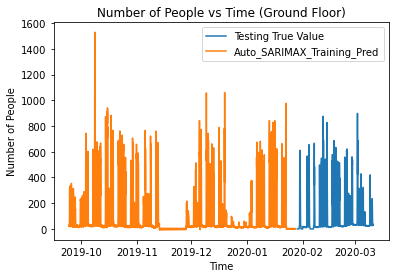

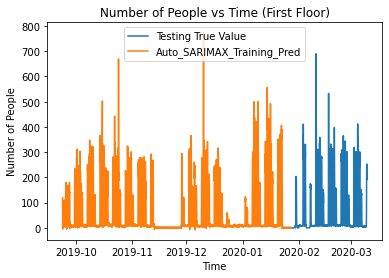

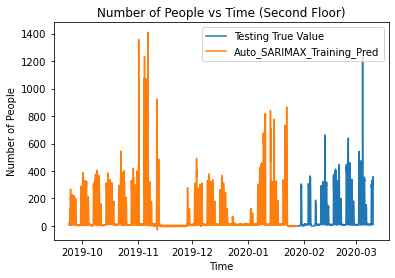

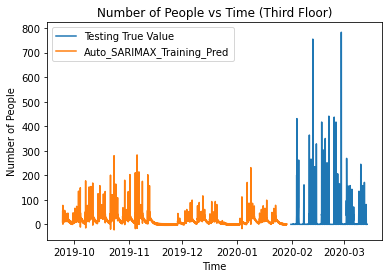

In [15]:
plt.figure(1)
plt.plot(ground_sarimax_test, label="Testing True Value")
plt.plot(ground_sarimax_predict, label='Auto_SARIMAX_Training_Pred')
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Number of People vs Time (Ground Floor)")
plt.legend()
plt.show()

plt.figure(2)
plt.plot(first_sarimax_test, label="Testing True Value")
plt.plot(first_sarimax_predict, label='Auto_SARIMAX_Training_Pred')
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Number of People vs Time (First Floor)")
plt.legend()
plt.show()

plt.figure(3)
plt.plot(second_sarimax_test, label="Testing True Value")
plt.plot(second_sarimax_predict, label='Auto_SARIMAX_Training_Pred')
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Number of People vs Time (Second Floor)")
plt.legend()
plt.show()

plt.figure(4)
plt.plot(third_sarimax_test, label="Testing True Value")
plt.plot(third_sarimax_predict, label='Auto_SARIMAX_Training_Pred')
plt.xlabel("Time")
plt.ylabel("Number of People")
plt.title("Number of People vs Time (Third Floor)")
plt.legend()
plt.show()